# Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


# Paths to Data

In [2]:
import os

# Assuming the dataset was downloaded to the current directory
dataset_path = 'dataset'

train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'valid')
test_path = os.path.join(dataset_path, 'test')

print(f"Training data path: {train_path}")
print(f"Validation data path: {val_path}")
print(f"Test data path: {test_path}")

Training data path: dataset/train
Validation data path: dataset/valid
Test data path: dataset/test


# EDA: Exploratory Data Analysis

Count images per class:

In [3]:
for folder in os.listdir(train_path):
    print(f"{folder}: {len(os.listdir(os.path.join(train_path, folder)))} images")

lacrosse: 151 images
shuffleboard: 130 images
arm wrestling: 99 images
golf: 157 images
surfing: 142 images
snow boarding: 117 images
parallel bar: 131 images
pole climbing: 118 images
giant slalom: 150 images
bobsled: 138 images
baton twirling: 108 images
weightlifting: 134 images
hydroplane racing: 108 images
barell racing: 123 images
water cycling: 103 images
mushing: 111 images
uneven bars: 156 images
pole vault: 138 images
roller derby: 163 images
rowing: 143 images
jousting: 118 images
air hockey: 112 images
sky surfing: 59 images
shot put: 149 images
sidecar racing: 133 images
field hockey: 157 images
harness racing: 147 images
disc golf: 123 images
canoe slamon: 164 images
football: 191 images
ski jumping: 130 images
ice yachting: 112 images
cricket: 129 images
figure skating women: 157 images
horse racing: 139 images
baseball: 174 images
billiards: 145 images
bowling: 120 images
motorcycle racing: 132 images
javelin: 136 images
fly fishing: 134 images
bull riding: 149 images
s

Visualize a few sample images:

Text(0.5, 1.0, 'Sample Image')

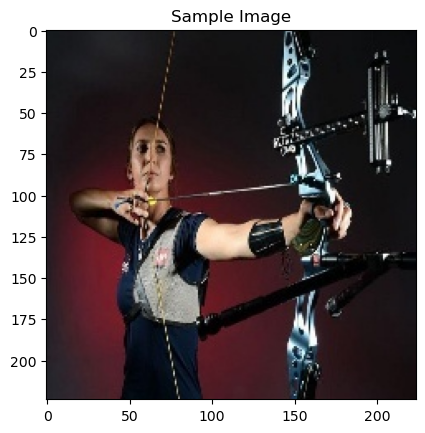

In [9]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./dataset/train/archery/001.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Image")

Plot class distribution (bar chart):

<Axes: >

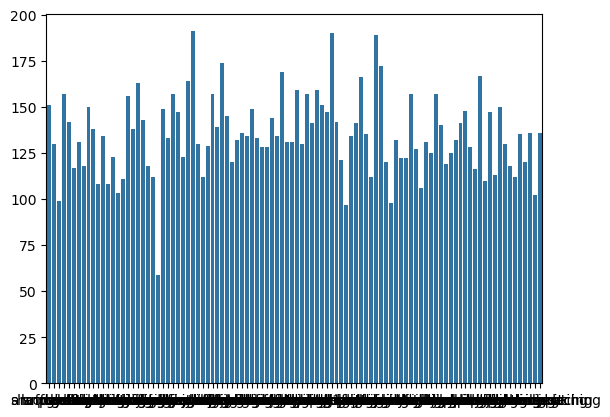

In [10]:
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in os.listdir(train_path)}
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))

In [11]:
import os
import cv2

def check_corrupted_images(path):
    corrupted_images = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                corrupted_images.append(img_path)
    return corrupted_images

# Check for corrupted images in the training set
corrupted_train_images = check_corrupted_images(train_path)
if corrupted_train_images:
    print("Corrupted training images:", corrupted_train_images)
else:
    print("No corrupted training images found.")

Corrupted training images: ['dataset/train/high jump/159.lnk']


In [12]:
import os
# Check for corrupted images in the training set
corrupted_train_images = check_corrupted_images(train_path)
if corrupted_train_images:
    print("Corrupted training images:", corrupted_train_images)
else:
    print("No corrupted training images found.")
# Assuming 'check_corrupted_images' function is defined earlier
corrupted_train_images = check_corrupted_images(train_path)

# Remove corrupted images
for img_path in corrupted_train_images:
    os.remove(img_path)
    print(f"Removed: {img_path}")  # Optional: Print to confirm removal

Corrupted training images: ['dataset/train/high jump/159.lnk']
Removed: dataset/train/high jump/159.lnk


In [15]:
import cv2
import numpy as np

image_sizes = []
aspect_ratios = []

for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            height, width, _ = img.shape
            image_sizes.append((width, height))
            aspect_ratios.append(width / height)

# Visualize distributions (e.g., using histograms or box plots)

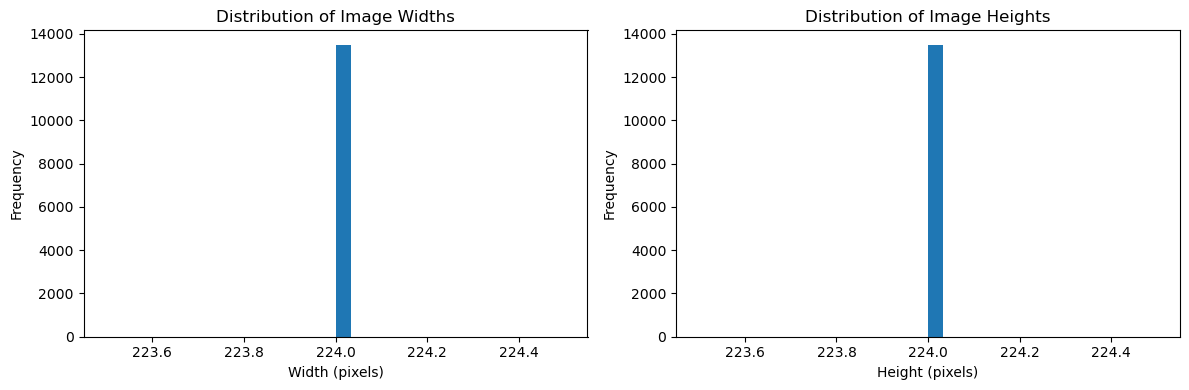

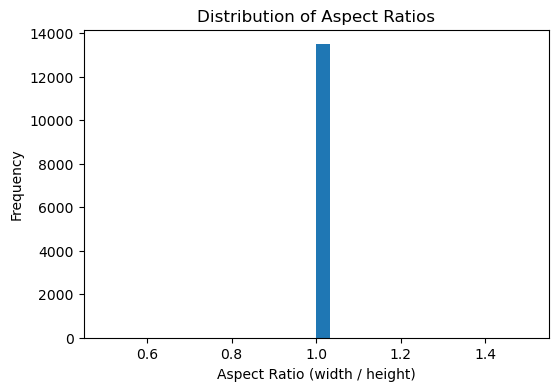

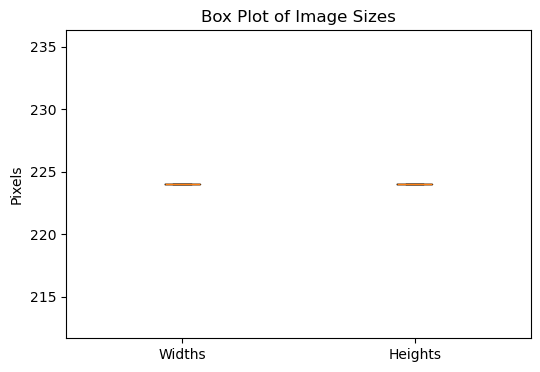

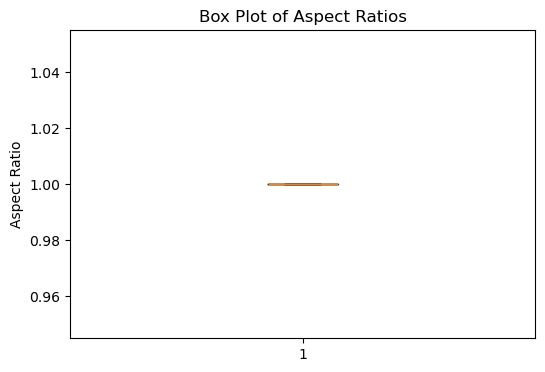

In [16]:
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

plt.figure(figsize=(12, 4))

# Histogram of Widths
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

# Histogram of Heights
plt.subplot(1, 2, 2)
plt.hist(heights, bins=30)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# --- Visualize Aspect Ratios ---
plt.figure(figsize=(6, 4))
plt.hist(aspect_ratios, bins=30)
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio (width / height)')
plt.ylabel('Frequency')
plt.show()

# --- Box Plots ---
plt.figure(figsize=(6, 4))
plt.boxplot([widths, heights], labels=['Widths', 'Heights'])
plt.title('Box Plot of Image Sizes')
plt.ylabel('Pixels')
plt.show()

plt.figure(figsize=(6, 4))
plt.boxplot(aspect_ratios)
plt.title('Box Plot of Aspect Ratios')
plt.ylabel('Aspect Ratio')
plt.show()

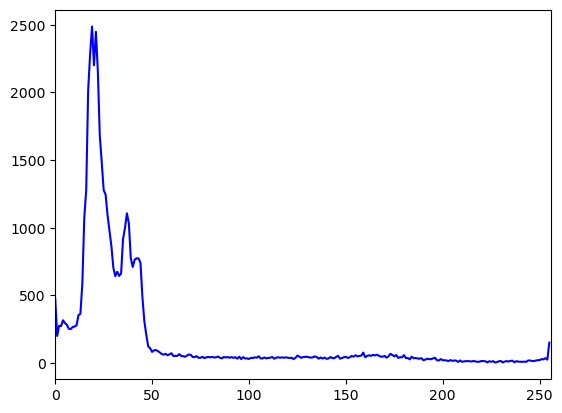

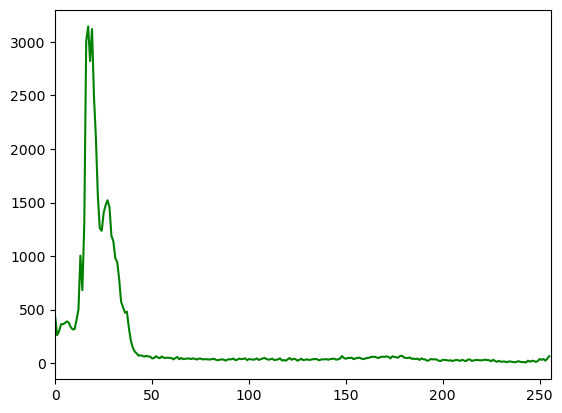

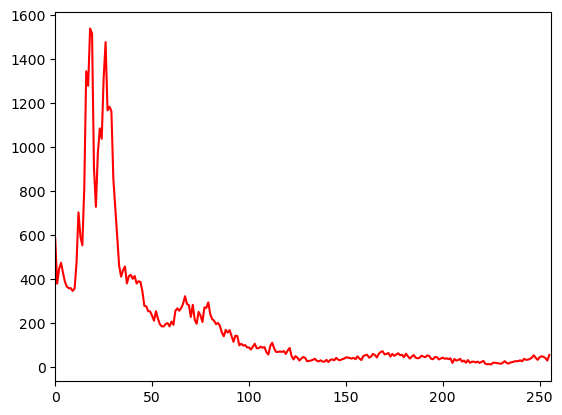

In [21]:
import cv2
import matplotlib.pyplot as plt

# Define image_path here
image_path = './dataset/train/archery/001.jpg'  # Replace with the actual path to your image

img = cv2.imread(image_path)
color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
  plt.show()

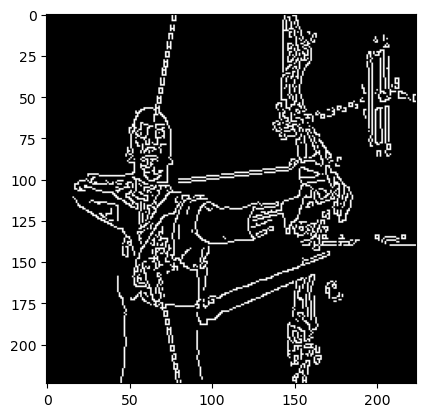

In [22]:
import cv2
import matplotlib.pyplot as plt # Import matplotlib for plotting

image_path = './dataset/train/archery/001.jpg'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap='gray')
plt.show()

# Define Image Data Generators (Augmentation + Rescale)

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow Data from Directories

In [24]:
train_gen = train_datagen.flow_from_directory(train_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

val_gen = val_datagen.flow_from_directory(val_path,
                                          target_size=(224, 224),
                                          batch_size=32,
                                          class_mode='categorical')

test_gen = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


# Plot Some Train Data

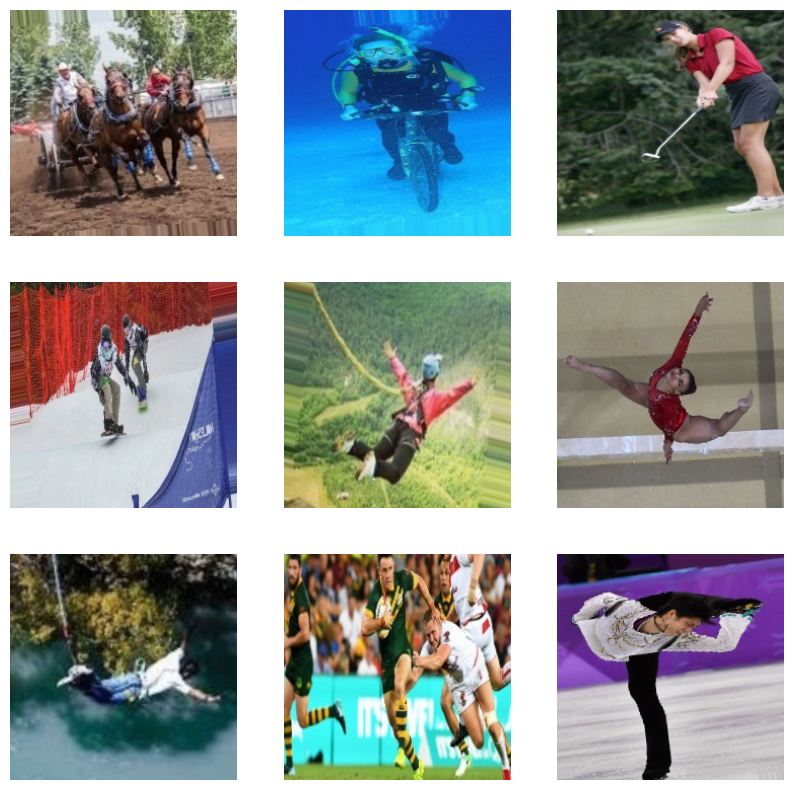

In [25]:
x_batch, y_batch = next(train_gen)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')

# Create Model by Transfer Learning

In [26]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3)) # Load ResNet50
for layer in base_model.layers[-5:]:  # Unfreeze the last 5 layers
         layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


# Callbacks Setup

In [29]:
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True)
earlystop = EarlyStopping(patience=5, restore_best_weights=True)

# Compile the Model

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [31]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,  # Reduced epochs
    callbacks=[checkpoint, earlystop]
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 20/422 ━━━━━━━━━━━━━━━━━━━━ 21:35 3s/step - accuracy: 0.0132 - loss: 5.0310

KeyboardInterrupt: 

# Show Training History (Accuracy & Loss)

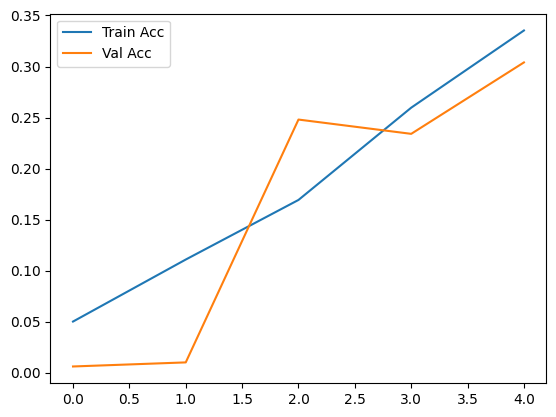

In [22]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

# Save the Model

In [24]:
model.save("final_model.h5")

# Load Best Weights

In [25]:
model.load_weights("best_model.h5")

# Evaluate on Test Data

In [26]:
model.evaluate(test_gen)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.2303 - loss: 3.0632


[3.0022006034851074, 0.22599999606609344]

# Make Predictions

In [27]:
predictions = model.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step


# Confusion Matrix & Report

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                       precision    recall  f1-score   support

           air hockey       0.36      0.80      0.50         5
      ampute football       0.00      0.00      0.00         5
              archery       0.00      0.00      0.00         5
        arm wrestling       0.00      0.00      0.00         5
         axe throwing       0.00      0.00      0.00         5
         balance beam       0.25      0.40      0.31         5
        barell racing       0.33      0.20      0.25         5
             baseball       0.20      0.40      0.27         5
           basketball       0.67      0.40      0.50         5
       baton twirling       0.00      0.00      0.00         5
            bike polo       0.00      0.00      0.00         5
            billiards       0.56      1.00      0.71         5
                  bmx       0.00      0.00      0.00         5
              bobsled       0.00      0.00      0.00         5
              bowling       0.00      0.00      0.00  

<Axes: >

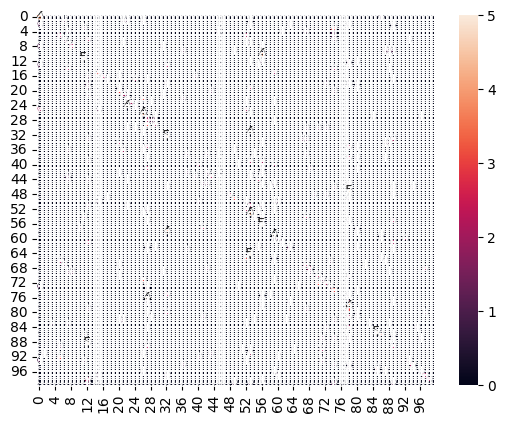

In [28]:
print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True)


#  Save Predictions (Optional)

In [30]:
import pandas as pd
df = pd.DataFrame({'Filename': test_gen.filenames, 'Actual': y_true, 'Predicted': y_pred})
df.to_csv('predictions.csv', index=False)

# Show Sample Predictions

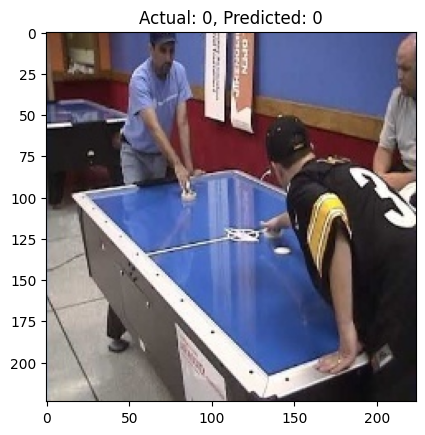

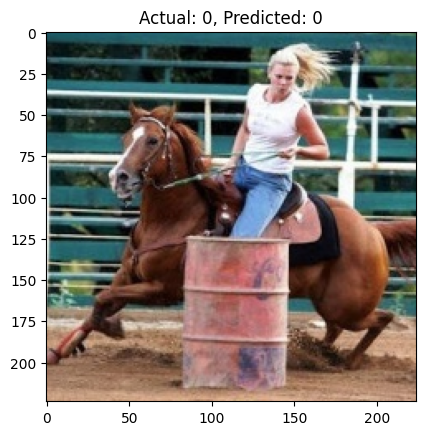

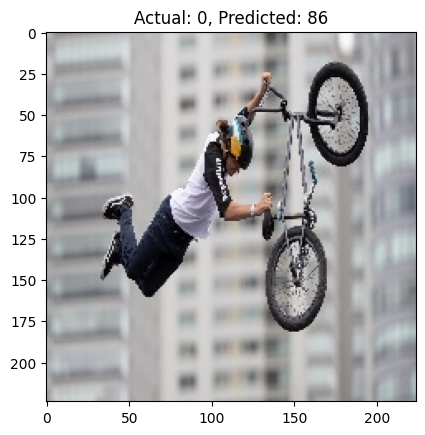

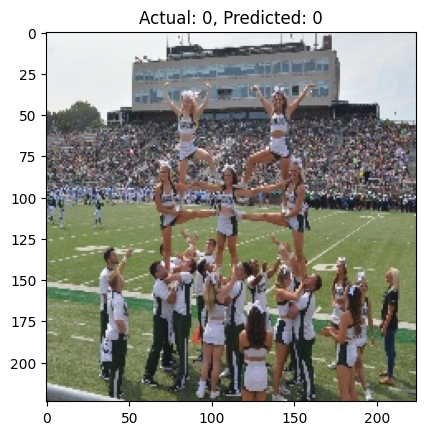

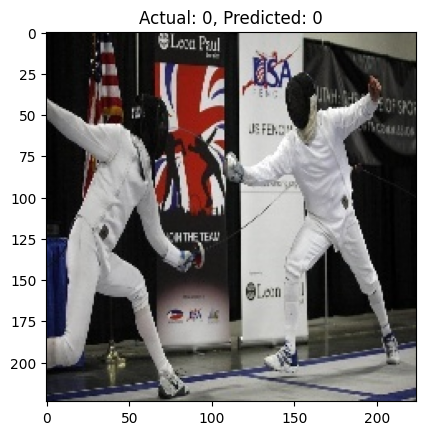

In [31]:
for i in range(5):
    img = test_gen[i][0][0]
    plt.imshow(img)
    plt.title(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}")
    plt.show()
